 # car sales prediction

In [73]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import seaborn as sns

In [74]:
df = pd.read_csv('used_car_price_dataset_extended.csv')

In [75]:
df.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [76]:
df.shape

(10000, 12)

In [77]:
df.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'fuel_type', 'owner_count',
       'price_usd', 'brand', 'transmission', 'color', 'service_history',
       'accidents_reported', 'insurance_valid'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [79]:
df.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [80]:
# Handling the  null values
df['service_history'].fillna('Partial', inplace=True)

C:\Users\yuvar\AppData\Local\Temp\ipykernel_8092\1611472281.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['service_history'].fillna('Partial', inplace=True)


# Exploratory Data analysis

# reduce the car’s price amount based on its age (year-wise depreciation).

In [82]:
# Data Preparation
df['car_age'] = 2025 - df['make_year']

# Price per cc in USD
df['price_per_cc'] = df['price_usd'] / df['engine_cc']

# Price in USD (per 1000 cc)
df['price_usd'] = df['price_per_cc'] * 1000

# Convert USD to INR
usd_to_inr = 83  # current conversion rate
df['price_inr'] = df['price_usd'] * usd_to_inr

# Round values
df['price_per_cc'] = df['price_per_cc'].round(2)
df['price_inr'] = df['price_inr'].round(2)

# Optional: drop old USD column if not needed
# df = df.drop(columns=['price_usd'])

In [58]:
# Convert Yes/No to 1/0
#df['insurance_valid'] = df['insurance_valid'].map({'Yes': 1, 'No': 0})

In [85]:
df['service_history'].value_counts(normalize = True)

service_history
Partial    0.5013
Full       0.4987
Name: proportion, dtype: float64

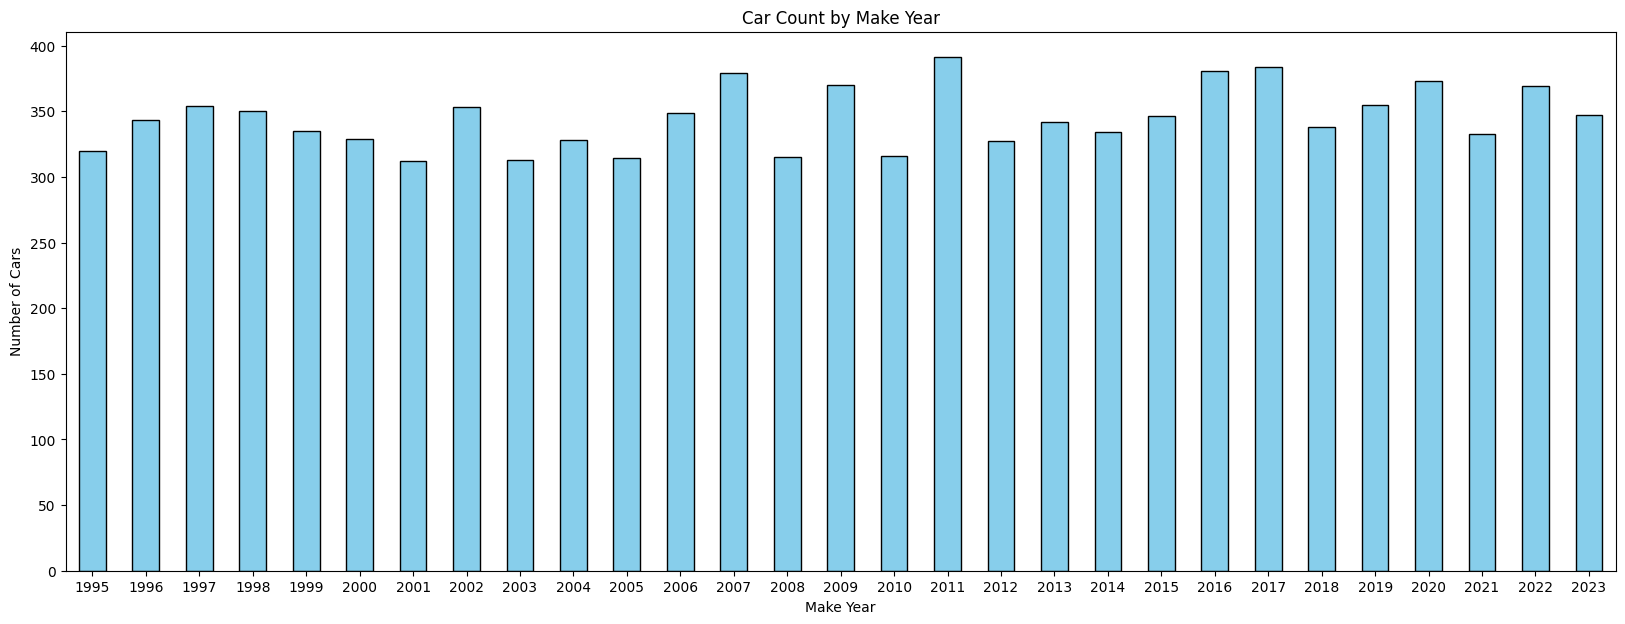

In [88]:
import matplotlib.pyplot as plt
make_year = df['make_year'].value_counts().sort_index()

plt.figure(figsize=(20,7))
make_year.plot(kind='bar', color='skyblue', edgecolor='black')  # 'block' → 'black'
plt.title('Car Count by Make Year')
plt.xlabel('Make Year')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # was misspelled as xtricks
plt.show()

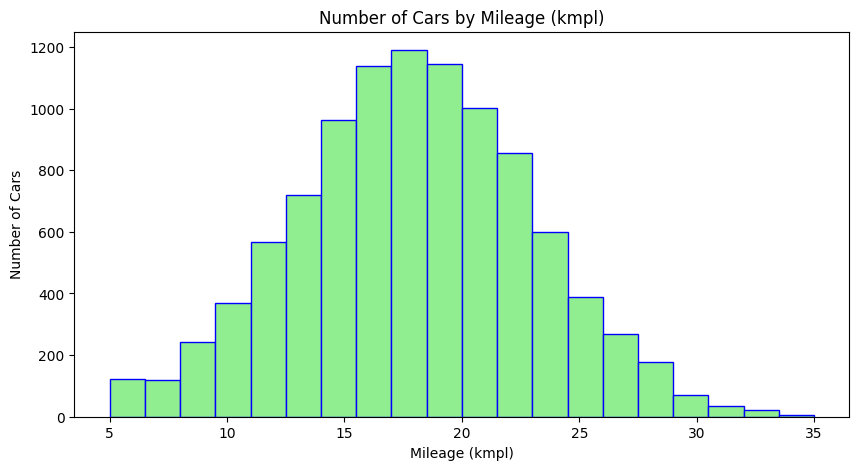

In [89]:
mileage_counts = df['mileage_kmpl'].value_counts().sort_index()

plt.figure(figsize=(10,5))
plt.hist(df['mileage_kmpl'], bins = 20, color='lightgreen', edgecolor='blue')
plt.title('Number of Cars by Mileage (kmpl)')
plt.xlabel('Mileage (kmpl)')
plt.ylabel('Number of Cars')
plt.xticks(rotation=0)  # better readability if many bars
plt.show()

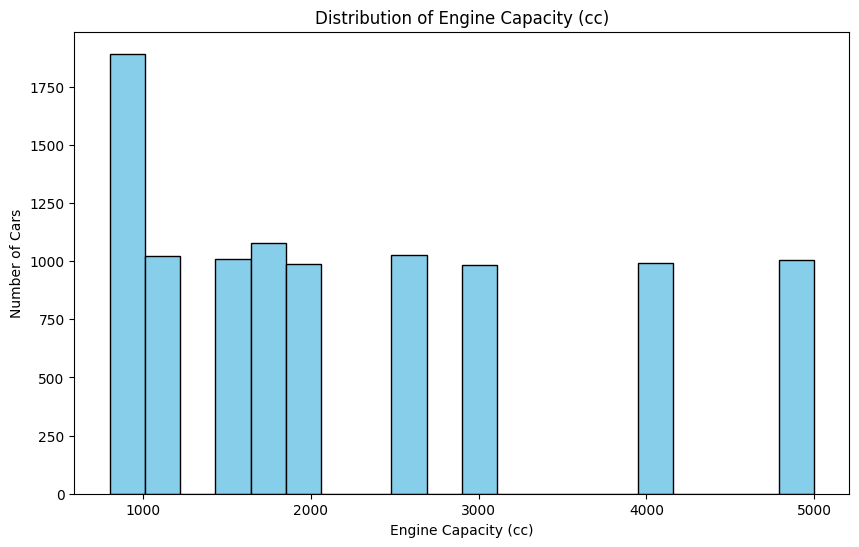

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.hist(df['engine_cc'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Engine Capacity (cc)')
plt.xlabel('Engine Capacity (cc)')
plt.ylabel('Number of Cars')
plt.show()

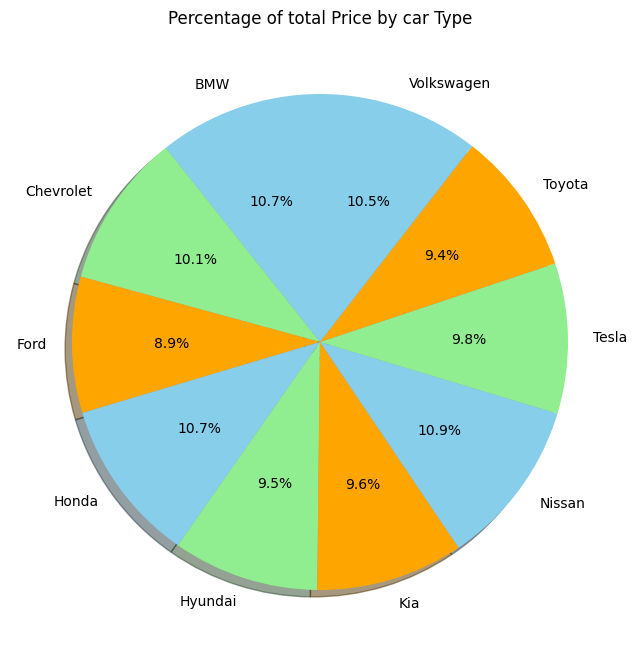

In [108]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('brand')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,9))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by car Type')
plt.ylabel('')
plt.show()

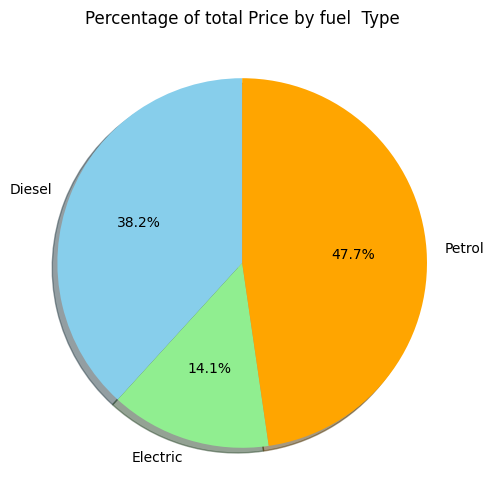

In [100]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('fuel_type')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,6))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by fuel  Type')
plt.ylabel('')
plt.show()

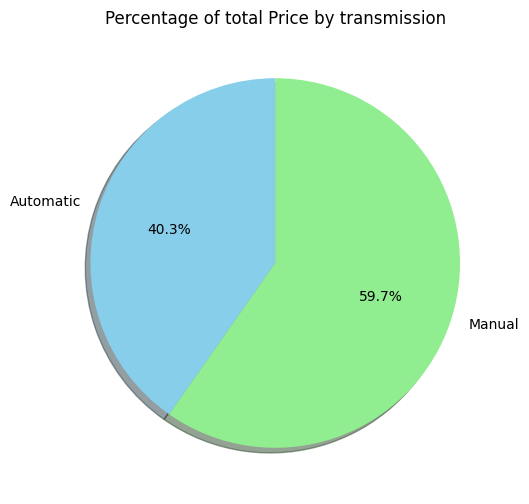

In [98]:
import matplotlib.pyplot as sns

fuel_price = df.groupby ('transmission')['price_inr'].sum()

fuel_price_percent = (fuel_price / fuel_price.sum()) * 100
plt.figure(figsize=(8,6))
fuel_price_percent.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue','lightgreen','orange'],
                        shadow=True)
plt.title('Percentage of total Price by transmission')
plt.ylabel('')
plt.show()

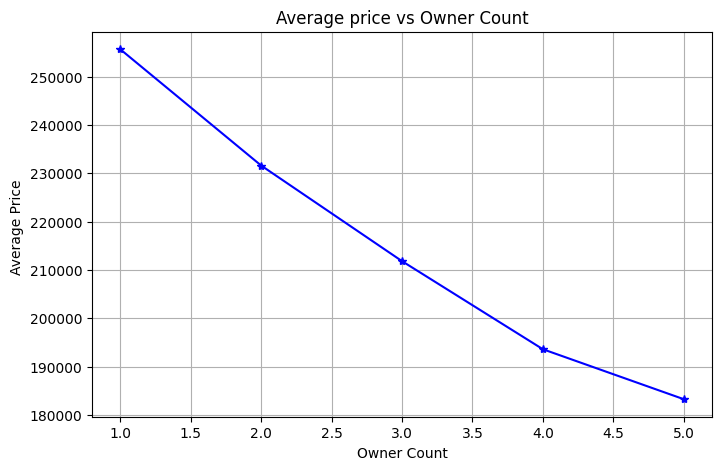

In [93]:
import matplotlib.pyplot as plt
owner_count = df.groupby('owner_count')['price_inr'].mean()
plt.figure(figsize=(8,5))
owner_count.plot(kind='line', marker = '*', color = 'blue')
plt.title('Average price vs Owner Count')
plt.xlabel('Owner Count')
plt.ylabel('Average Price ')
plt.xticks(rotation=0)
plt.grid(True)
plt.show()

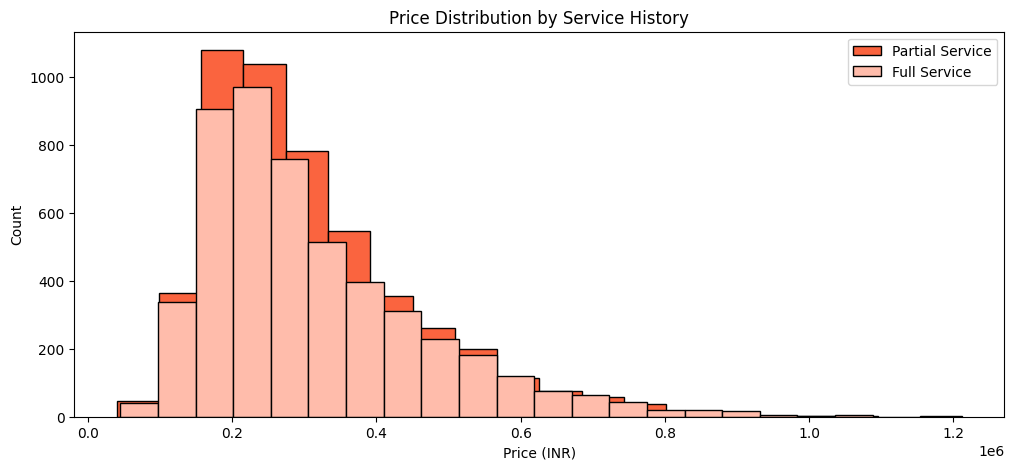

In [66]:
import matplotlib.pyplot as plt

# Histogram: Full vs Partial service history
plt.figure(figsize=(12,5))
plt.hist(df[df['service_history'] == 'Full']['price_inr'], 
         histtype='barstacked', bins=20, edgecolor='k', color='#FA643F', label='Partial Service')
plt.hist(df[df['service_history'] == 'Partial']['price_inr'], 
         histtype='barstacked', bins=20, edgecolor='k', color='#FFBCAB', label='Full Service')
plt.legend()
plt.title('Price Distribution by Service History')
plt.xlabel('Price (INR)')
plt.ylabel('Count')
plt.show()

<Figure size 800x500 with 0 Axes>

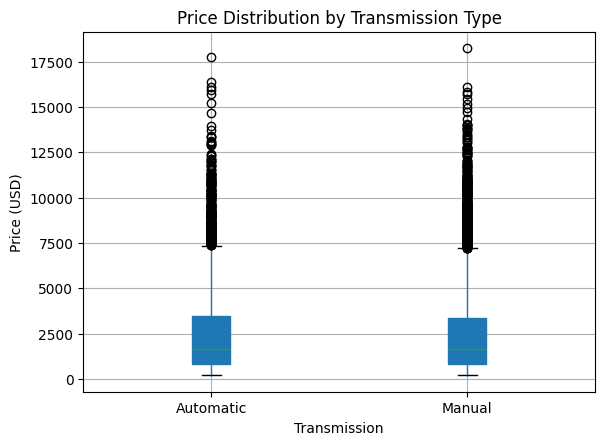

In [94]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df.boxplot(column='price_usd', by='transmission', patch_artist=True)
plt.title('Price Distribution by Transmission Type')
plt.suptitle('')  # remove default 'Boxplot grouped by transmission'
plt.xlabel('Transmission')
plt.ylabel('Price (USD)')
plt.show()

# Statistics part

In [109]:
avg_price  = df["price_per_cc"].mean()
std_price = df["price_per_cc"].std()
print("Average engine size: ", avg_price)
print("Standard Deviation of Price:", std_price)

Average engine size:  2.5924129999999996
Standard Deviation of Price: 2.5168273419958593


In [110]:
avg_mileage = df['mileage_kmpl'].mean()
std_mileage = df['mileage_kmpl'].std()
print(f"average mileage size: {avg_mileage:.1f} cc (± {std_mileage:.1f})")

average mileage size: 18.0 cc (± 5.0)


In [111]:
avg_age = df["car_age"].mean()
std_age = df["car_age"].std()
print(f"Average car age: {avg_age:.1f} years (± {std_age:.1f})")

Average car age: 15.8 years (± 8.4)


In [112]:
avg_owners = df["owner_count"].mean()
std_owners = df["owner_count"].std()
print(f"Average owners: {avg_owners:.1f} (± {std_owners:.1f})")

Average owners: 3.0 (± 1.4)


In [113]:
mean_fuel = df.groupby("fuel_type")["price_per_cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(mean_fuel)

               mean       std
fuel_type                    
Electric   3.741160  3.414405
Petrol     2.489306  2.365681
Diesel     2.442920  2.368978


In [114]:
mean_service = df.groupby("service_history")["price_per_cc"].agg(["mean", "std"]).sort_values("mean", ascending=False)
print(mean_service)

                     mean       std
service_history                    
Partial          2.631107  2.599799
Full             2.553517  2.430211


# Inferential statistics 

# Do cars with Full service history have a different average number of 
# owners compared to cars with Partial service history?

In [ ]:
# Do cars with Full service history have a different average number of 
# owners compared to cars with Partial service history?
#T-test (Welch’s t-test) to compare owner counts between Full and Partial service cars
# H0 (Null Hypothesis): Mean owner_count of Full service cars = Mean owner_count of Partial service cars
# H1 (Alternate Hypothesis): Mean owner_count of Partial service cars > Mean owner_count of Full service cars

In [115]:
# T -test 
from scipy .stats import ttest_ind
full_prices = df[df["service_history"] == "Full"]["owner_count"]
partial_prices = df[df["service_history"] == "Partial"]["owner_count"]
t_stat, p_val = ttest_ind(full_prices, partial_prices, equal_var=False)
print(f"test(full vs Partial service price): t = {t_stat:.2f}, p = {p_val:.3f}")

test(full vs Partial service price): t = -2.52, p = 0.012


In [ ]:
# If ANOVA shows a significant difference, you can adjust pricing models based on service history.

# For example, Full service cars with fewer owners may command higher prices in INR.

In [119]:
# Anova Compare the mean owner count across all service history groups (Full, Partial, Others) but only for cars with valid insurance.

from scipy.stats import f_oneway

df_valid = df[df["insurance_valid"] == "Yes"]

groups = [group["owner_count"].values for name, group in df_valid.groupby("service_history")]

f_stat, p_val = f_oneway(*groups)

print(f"anova (service history vs owner count , only licenced cars): f={f_stat:.2f}, p = {p_val:.3f}")

anova (service history vs owner count , only licenced cars): f=7.21, p = 0.007


In [ ]:
# Chi aquare We want to test whether owner count categories and price categories are independent 
# among Full service cars with valid insurance. # owner count and price are dependent

In [122]:

from scipy.stats import chi2_contingency

# Filter Full Service cars with valid insurance
df_full = df[(df['service_history'] == 'Full') & (df['insurance_valid'] == 'Yes')].copy()

# Keep relevant columns
df_full = df_full[['owner_count', 'price_usd']]

# Convert price to numeric
df_full['price_usd'] = pd.to_numeric(df_full['price_usd'], errors='coerce')
df_full = df_full.dropna(subset=['owner_count', 'price_usd'])

# Fixed bins for price (USD)
price_bins = [0, 10000, 20000, 50000, 100000]  # Adjust max as needed
price_labels = ['0-10k', '10k-20k', '20k-50k', '50k+']
df_full['price_category'] = pd.cut(df_full['price_usd'], bins=price_bins, labels=price_labels, include_lowest=True)

# Fixed bins for owner_count
owner_bins = [0, 1, 2, 3, 10]  # Adjust max as needed
owner_labels = ['0-1', '1-2', '2-3', '3+']
df_full['owner_count_cat'] = pd.cut(df_full['owner_count'], bins=owner_bins, labels=owner_labels, include_lowest=True)

# Create contingency table
contingency_table = pd.crosstab(df_full['price_category'], df_full['owner_count_cat'])
print("Contingency Table:\n", contingency_table)

# Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"\nChi-square Test: χ² = {chi2:.2f}, p = {p:.3f}, dof = {dof}")

Contingency Table:
 owner_count_cat  0-1  1-2  2-3    3+
price_category                      
0-10k            793  803  752  1542
10k-20k           26   21   11    15

Chi-square Test: χ² = 17.64, p = 0.001, dof = 3


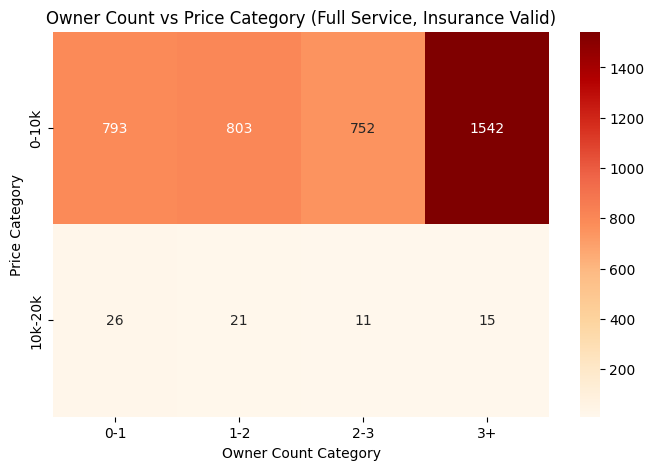

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of contingency table
plt.figure(figsize=(8,5))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='OrRd', cbar=True)
plt.title('Owner Count vs Price Category (Full Service, Insurance Valid)')
plt.xlabel('Owner Count Category')
plt.ylabel('Price Category')
plt.show()

In [142]:
# Ensure reduce accident report
df['car_age'] = pd.to_numeric(df['car_age'], errors='coerce')

# Keep only cars with car_age <= 12
df = df[df['car_age'] <= 12]

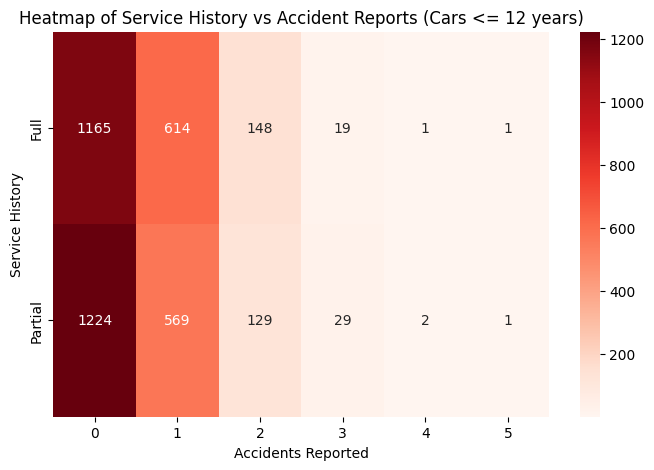

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter cars with car_age <= 12
df_filtered = df[df['car_age'] <= 12].copy()

# Example: Create a pivot table for Full vs Partial service history vs accident reports
pivot_table = pd.crosstab(df_filtered['service_history'], df_filtered['accidents_reported'])

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='Reds', cbar=True)
plt.title('Heatmap of Service History vs Accident Reports (Cars <= 12 years)')
plt.xlabel('Accidents Reported')
plt.ylabel('Service History')
plt.show()

In [145]:
df['service_history'] = df ['service_history'].str.lower()
df['brand'] = df['brand'].str.lower()
df['transmission'] = df['transmission'].str.lower()
df['fuel_type'] = df['fuel_type'].str.lower()
df['color'] = df['color'].str.lower()

# Feature Engineering techniques

In [146]:
from sklearn.preprocessing import LabelEncoder 

# Create a label Encoder object
le = LabelEncoder()

df['insurance_valid'] = le.fit_transform(df['insurance_valid'].values)

# Machine learning algorithm

In [147]:
# Machine learning algorithm
from sklearn. preprocessing import StandardScaler,OrdinalEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pickle

In [149]:
x = df.drop(columns=['car_age', 'price_usd' ,'price_per_cc', 'price_inr'])
y = df['price_inr']

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state = 42)

In [151]:
preprocessor  = ColumnTransformer(transformers=[
    ('Ordinal', OrdinalEncoder(), ['fuel_type','brand','service_history','color','transmission']),
    ('num', StandardScaler(), ['make_year','mileage_kmpl','engine_cc','owner_count','accidents_reported','insurance_valid'])
], remainder ='passthrough')

In [152]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor())
])

In [153]:
pipeline.fit(x_train,y_train)

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('Ordinal', ...), ('num', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [154]:
# Predictions
y_pred  = pipeline.predict(x_test)

In [155]:
r2_score(y_test, y_pred)

0.9372924358898026

In [156]:
r2_score(y_test, y_pred)

0.9372924358898026

In [157]:
kfold = KFold(n_splits=5, shuffle = True, random_state=42)
cv_results = cross_val_score(pipeline, x,y, cv=kfold, scoring = 'r2')

In [158]:
cv_results.mean()

0.9327664864260015

In [327]:
with open('car sales price_model.pkl','wb') as f:
    pickle.dump(pipeline,f)

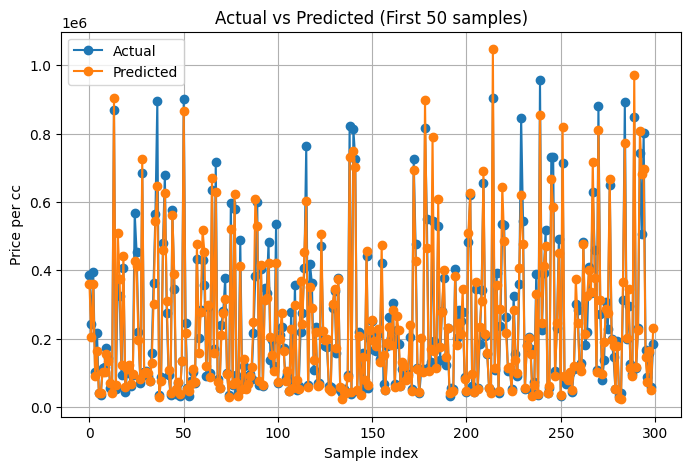

In [159]:
# Regressio
plt.figure(figsize=(8,5))
plt.plot(y_test.values[:300],label="Actual", marker='o')
plt.plot(y_pred[:300],label='Predicted', marker='o')
plt.xlabel("Sample index")
plt.ylabel("Price per cc")
plt.title("Actual vs Predicted (First 50 samples)")
plt.legend()
plt.grid(True)
plt.show()

In [160]:
import pandas as pd
sample = pd.DataFrame([{"make_year" : 2014, "mileage_kmpl": 8.17,
    "engine_cc": 4000,
    "fuel_type": "petrol",
    "owner_count": 4,
    "brand": "chevrolet",
    "transmission": "manual",
    "color": "white",
    "service_history": "partial",
    "accidents_reported": 0,
    "insurance_valid": 1
}])
y_pred = pipeline.predict(sample)
print(y_pred)

[24209.951]


In [ ]:
# total_price_inr = 1.4390583 * 10000 * 100 ≈ 14,390,580 INR ≈ 14 Lakh